In [3]:
import pandas as pd

orders = pd.read_csv("../data/data_orders.csv")
offers = pd.read_csv("../data/data_offers.csv")

orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [2]:
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [5]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


In [6]:
orders["order_gk"] = orders["order_gk"].astype(str)
offers["order_gk"] = offers["order_gk"].astype(str)

orders["order_gk"].dtype, offers["order_gk"].dtype

(dtype('O'), dtype('O'))

In [7]:
#Task 2 merger of datasets
df = orders.merge(
    offers,
    how="inner",
    on="order_gk"
)

df.head()


,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [8]:
df.shape

(31268, 9)

In [9]:
df["order_gk"].nunique()

7610

In [10]:
orders["order_gk"].nunique()

10716

In [11]:
#Task 3: Clean and rename the data
import numpy as np

df["is_driver_assigned"] = np.where(
    df["is_driver_assigned_key"] == 1, "Yes", "No"
)

df["order_status"] = np.where(
    df["order_status_key"] == 4, "Client Cancelled", "System Reject"
)

In [12]:
df.drop(
    columns=["is_driver_assigned_key", "order_status_key"],
    inplace=True
)

In [13]:
df.rename(
    columns={"order_datetime": "order_time"},
    inplace=True
)

In [14]:
df.head()

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31268 entries, 0 to 31267
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_time                     31268 non-null  object 
 1   origin_longitude               31268 non-null  float64
 2   origin_latitude                31268 non-null  float64
 3   m_order_eta                    8364 non-null   float64
 4   order_gk                       31268 non-null  object 
 5   cancellations_time_in_seconds  21795 non-null  float64
 6   offer_id                       31268 non-null  int64  
 7   is_driver_assigned             31268 non-null  object 
 8   order_status                   31268 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 2.1+ MB


In [16]:
#Task 4: Distribution of Failed Orders 
df.groupby(
    ["is_driver_assigned", "order_status"]
)["order_gk"].count()

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

In [17]:
df_q4 = df.pivot_table(
    index="is_driver_assigned",
    columns="order_status",
    values="order_gk",
    aggfunc="count"
)

df_q4

order_status,Client Cancelled,System Reject
is_driver_assigned,,
No,13435,9469
Yes,8360,4


<Axes: title={'center': 'Distribution of Failed Orders by Reason and Driver Assignment'}, xlabel='is_driver_assigned'>

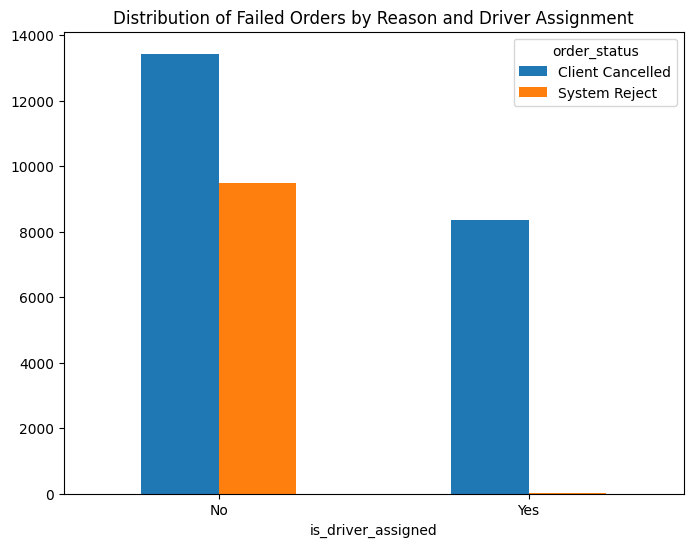

In [18]:
df_q4.plot(
    kind="bar",
    figsize=(8, 6),
    title="Distribution of Failed Orders by Reason and Driver Assignment",
    rot=0
)

In [19]:
#Task5: Failed Orders by hour
df["order_hour"] = df["order_time"].str.split(":").str[0]
df[["order_time", "order_hour"]].head()

,order_time,order_hour
0,18:08:07,18
1,20:57:32,20
2,20:57:32,20
3,20:57:32,20
4,12:07:50,12


<Axes: title={'center': 'Total Failed Orders by Hour'}, xlabel='Hour of Day', ylabel='Number of Failed Orders'>

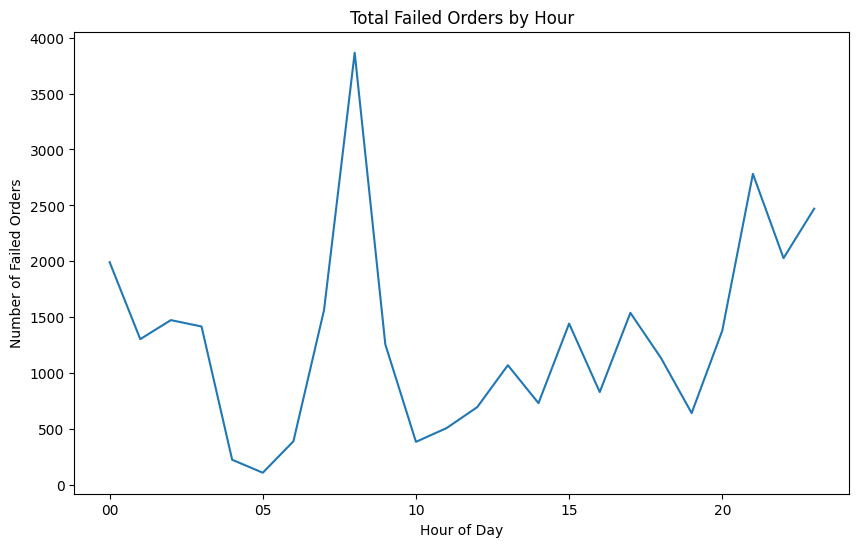

In [20]:
df.groupby("order_hour")["order_gk"].count().plot(
    figsize=(10, 6),
    title="Total Failed Orders by Hour",
    xlabel="Hour of Day",
    ylabel="Number of Failed Orders"
)

In [22]:
hourly_failures = df.groupby(
    ["order_hour", "is_driver_assigned", "order_status"]
)["order_gk"].count().reset_index()

<Axes: title={'center': 'Hourly Distribution of Failed Orders by Category'}, xlabel='order_hour'>

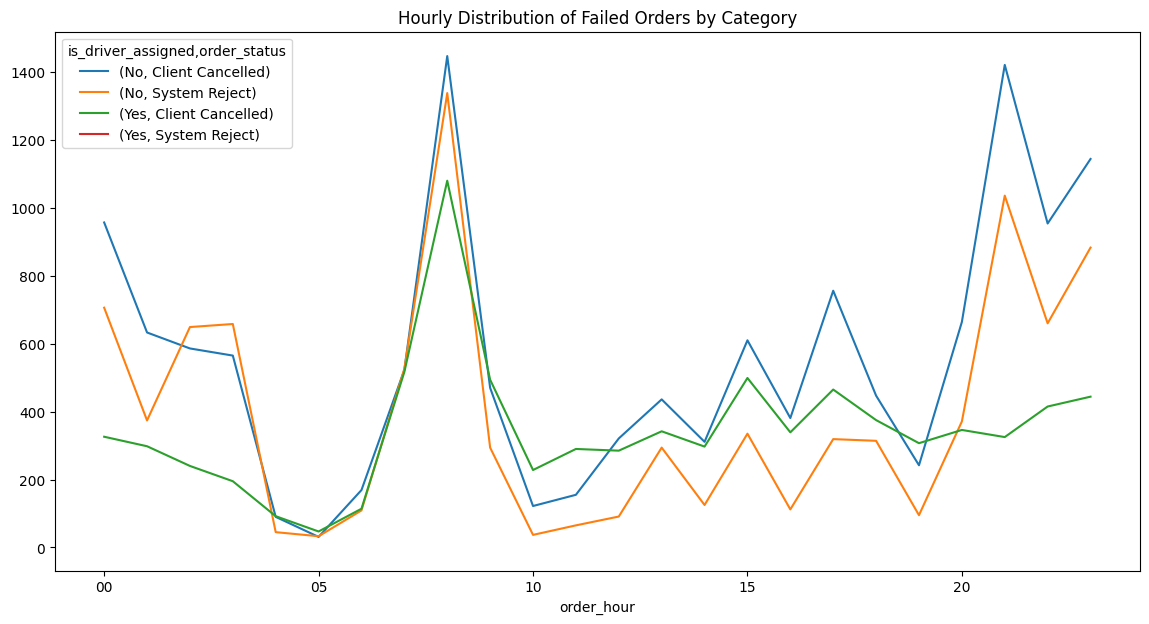

In [23]:
hourly_pivot = hourly_failures.pivot(
    index="order_hour",
    columns=["is_driver_assigned", "order_status"],
    values="order_gk"
)

hourly_pivot.plot(
    figsize=(14, 7),
    title="Hourly Distribution of Failed Orders by Category"
)

In [24]:
#TAsk:6Average Time to cancellection 
df_clean = df[df["cancellations_time_in_seconds"] < 3600]

In [25]:
avg_cancel_time = df_clean.groupby(
    ["order_hour", "is_driver_assigned"]
)["cancellations_time_in_seconds"].mean().reset_index()

<Axes: title={'center': 'Average Time to Cancellation by Hour and Driver Assignment'}, xlabel='Hour of Day', ylabel='Avg Cancellation Time (seconds)'>

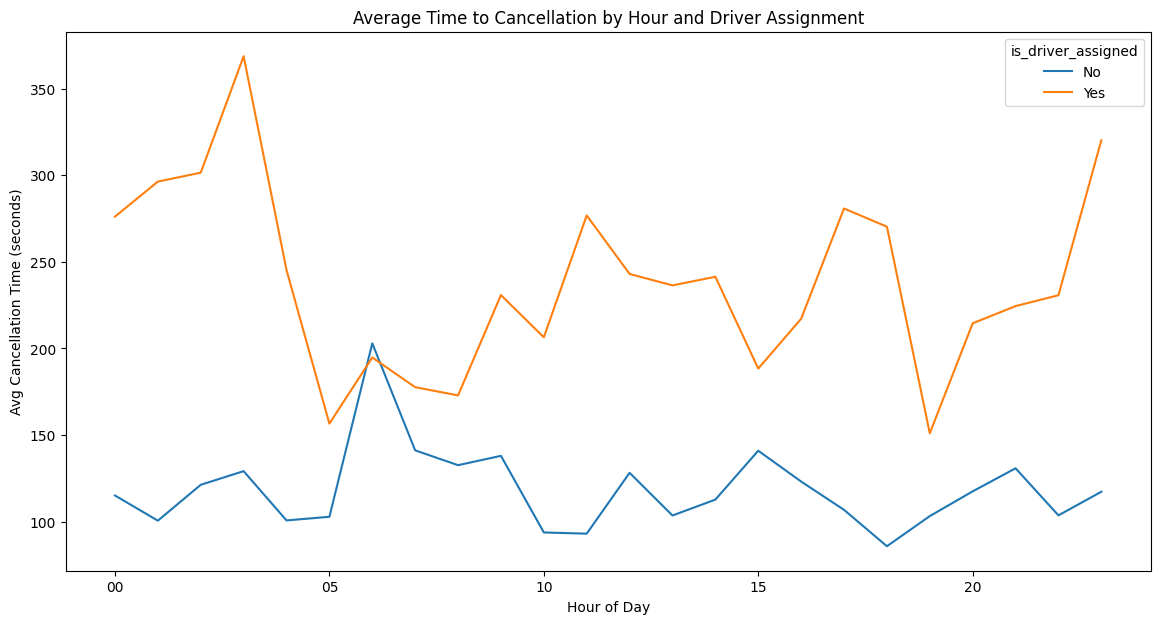

In [26]:
avg_cancel_pivot = avg_cancel_time.pivot(
    index="order_hour",
    columns="is_driver_assigned",
    values="cancellations_time_in_seconds"
)

avg_cancel_pivot.plot(
    figsize=(14, 7),
    title="Average Time to Cancellation by Hour and Driver Assignment",
    xlabel="Hour of Day",
    ylabel="Avg Cancellation Time (seconds)"
)

In [27]:
#Task 7 : Average ETA By hour 

In [28]:
df["m_order_eta"].describe()

count    8364.000000
mean      473.206480
std       285.080429
min        60.000000
25%       238.000000
50%       419.000000
75%       658.000000
max      1387.000000
Name: m_order_eta, dtype: float64

In [29]:
avg_eta_by_hour = df.groupby("order_hour")["m_order_eta"].mean()
avg_eta_by_hour

order_hour
00    375.433333
01    355.322148
02    389.554167
03    381.492308
04    266.119565
05    476.787234
06    489.456140
07    642.746615
08    671.086111
09    556.085020
10    424.969298
11    405.837931
12    504.691228
13    445.228070
14    406.383838
15    518.218437
16    456.958702
17    548.673118
18    421.725333
19    396.850163
20    299.627168
21    365.630769
22    365.896386
23    386.078829
Name: m_order_eta, dtype: float64

<Axes: title={'center': 'Average ETA by Hour of Day'}, xlabel='Hour of Day', ylabel='Average ETA (seconds)'>

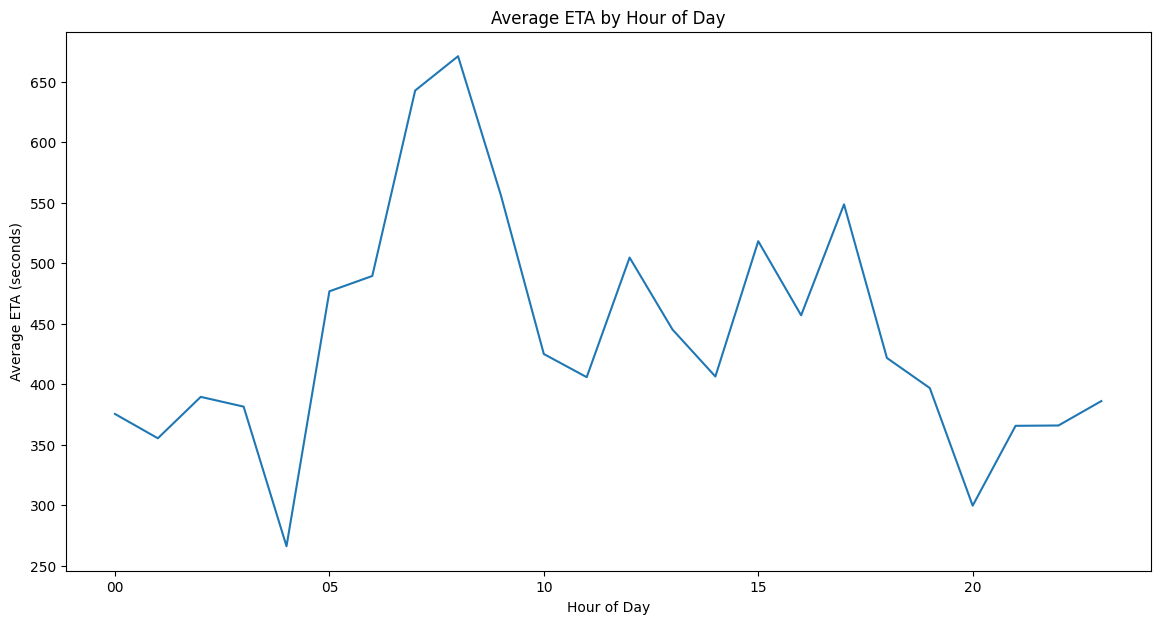

In [30]:
avg_eta_by_hour.plot(
    figsize=(14, 7),
    title="Average ETA by Hour of Day",
    xlabel="Hour of Day",
    ylabel="Average ETA (seconds)"
)